# Домашняя работа №1
Срок сдачи: 9 октября 2017, 23:59 <br>
При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br> IDA<Номер группы>HW1<Фамилия>.ipynb - например IDA1HW1Panov.ipynb <br>
Сопровождайте ваш код изображеними, комментариями и выводами. <br> Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
Используйте данный Ipython Notebook при оформлении домашнего задания.

# Регрессия с SVM (3 балла)



SVM можно использовать и для задачи регрессии.
Загрузите набор данных из titanium.csv
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  GridSearchCV
%matplotlib inline

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Администратор\\Downloads\\titanium.csv",sep=",")

In [3]:
df.head(5)

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


# Визуализация данных (1 балл)
Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [4]:
df['x'].mean()

825.0

In [5]:
df['x'].std()

142.88690166235207

In [6]:
df['x']= (df['x']- df['x'].mean())/df['x'].std()

In [7]:
df.head(5)

,x,y
0,-1.679650,0.644
1,-1.609665,0.622
2,-1.539679,0.638
3,-1.469694,0.649
4,-1.399708,0.652


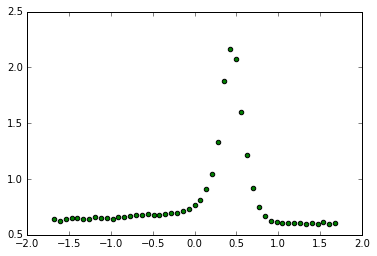

In [8]:
plt.scatter(df['x'],df['y'], c='g')

In [9]:
df.head(5)

,x,y
0,-1.679650,0.644
1,-1.609665,0.622
2,-1.539679,0.638
3,-1.469694,0.649
4,-1.399708,0.652


# Обучение моделей (2 балла)

Рассмотрим 3 ядра:

Линейное

Полиномиальное (degree = 3, gamma = 6, coef0 = 1)

RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации epsilon=0.01

Для каждого из ядер:
Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). 

Ошибка измеряется как средняя абсолютная ошибка.

Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.
В каких случаях возникают эффекты недообучения, переобучения?

In [10]:
epsilon=0.01

In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\Администратор\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df['x']),np.array(df['y']), test_size = 0.3, random_state = 23)

In [13]:
from sklearn.svm import SVR



In [14]:
C_array = np.logspace(-5, 6,base= 10, num=20)

In [15]:
C_array.size

20

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
#вспомогательные списки
ns1=[]
nss1=[]

# ЛИНЕЙНОЕ

In [18]:
for i in C_array:
    svrr = SVR(C=i, kernel='linear',epsilon=0.01)
    svrr.fit(X_train.reshape(-1,1), y_train)
    y_pred=svrr.predict(X_test.reshape(-1,1))
    
    y_predd1=svrr.predict(X_train.reshape(-1,1))
    
    ns1.append( mean_absolute_error(y_test,y_pred))
    nss1.append( mean_absolute_error(y_train,y_predd1))

In [19]:
ns1

[0.23496002721074249,
 0.23503457494033547,
 0.23531731138310416,
 0.23615549057788049,
 0.23844086029755654,
 0.23936825390211458,
 0.23936825345533308,
 0.2386088739165477,
 0.238276333814747,
 0.23795660709143504,
 0.23794099343705366,
 0.2379471855179949,
 0.23874866902862471,
 0.23800328053542238,
 0.23795666530316714,
 0.2379836337552223,
 0.23840519830919107,
 0.23723875782785458,
 0.22230366040175731,
 0.24468308653494925]

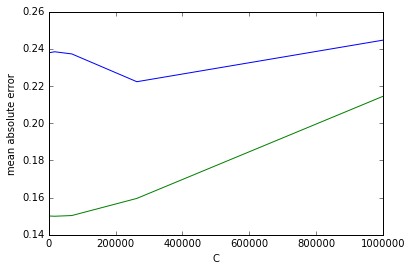

In [20]:
plt.plot(C_array,ns1)
plt.plot(C_array,nss1)
plt.xlabel('C')
plt.ylabel('mean absolute error')

In [21]:
#По рисунку видно, что при значении С чуть больше 200000 ошибка на тесте минимальна, ошибка на обучении тоже невысокая

In [22]:
C_array[15:]

array([    4832.93023857,    18329.80710832,    69519.27961776,
         263665.08987304,  1000000.        ])

In [23]:
C_array[18]#наше лучшее С

263665.0898730366

Обучим модель с лучшим значением параметра С

In [24]:
svrrr = SVR(C=C_array[18], kernel='linear',epsilon=0.01)
svrrr.fit(X_train.reshape(-1,1), y_train)
y_predd=svrrr.predict(X_test.reshape(-1,1))

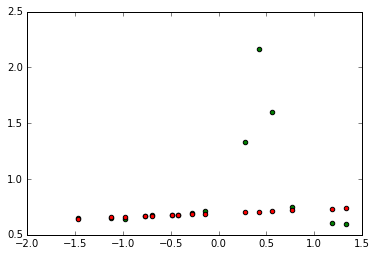

In [25]:
plt.scatter(X_test,y_test,c='g')#ответ
plt.scatter(X_test,y_predd,c='r')#предсказание

Как видно, алгоритм не очень хорошо предсказывает ответы ( есть объекты, которые он вообще предсказал неверно).Переобучения нет, скорее недообучение.

# ПОЛИНОМИАЛЬНОЕ

In [26]:
C_array1 = np.logspace(-5, 6,base= 10, num=10)#возьмем 10 чисел, поскольку для 20 считается очень долго

In [27]:
ns2=[]
nss2=[]

In [28]:
for j in C_array1:
    sv = SVR(C=j, kernel='poly',degree = 3, gamma = 6, coef0 = 1,epsilon=0.01)
    sv.fit(X_train.reshape(-1,1), y_train)
    y_predd=sv.predict(X_test.reshape(-1,1))
    ns2.append( mean_absolute_error(y_test,y_predd))
    
    #print(mean_absolute_error(y_test,y_predd))
    y_predd2=sv.predict(X_train.reshape(-1,1))
    nss2.append( mean_absolute_error(y_train,y_predd2))
    #print(mean_absolute_error(y_train,y_predd2))

In [29]:
ns2

[0.22191641380139313,
 0.21752610710723116,
 0.21327485898242265,
 0.21326494197862703,
 0.21241371819965288,
 0.2101910543709645,
 0.21137915910128122,
 0.3062504802998533,
 0.75167508540197414,
 10.16623499015042]

In [30]:
nss2

[0.13732432947882314,
 0.13254674872454889,
 0.13164499563543688,
 0.13164338976525974,
 0.13145733103490961,
 0.13102878700753731,
 0.13825729450768584,
 0.31627669615364062,
 1.3000471013053687,
 20.895504639394407]

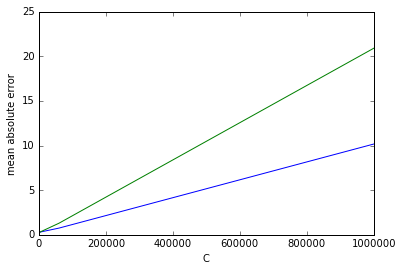

In [31]:
plt.plot(C_array1,ns2)
plt.plot(C_array1,nss2)
plt.xlabel('C')
plt.ylabel('mean absolute error')

In [32]:
#видно, что с увеличением значения параметра С ошибки и на тесте, и на обучении увеличивается. 
#Самое лучшее С -маленькое С

In [33]:
C_array1[5]#наше лучшее значение С (МАЕ минимальна и на тесте, и на обучении при таком С, если посмотреть)

12.915496650148853

Обучим модель с лучшим значением параметра С

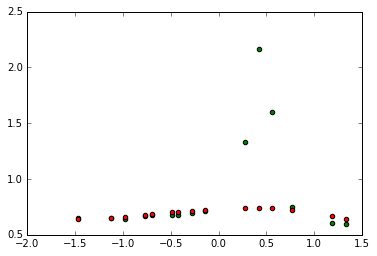

In [34]:
svv = SVR(C=C_array1[5], kernel='poly',degree = 3, gamma = 6, coef0 = 1,epsilon=0.01)
svv.fit(X_train.reshape(-1,1), y_train)
y_preddd=svv.predict(X_test.reshape(-1,1))
plt.scatter(X_test,y_test,c='g')#ответ
plt.scatter(X_test,y_preddd,c='r')#предсказание

Как видно, эта модель лучше предыдущей предсказывает ответы, но все также есть объекты, которые она предсказать вообще не смогла. Скорее всего, ее надо дообучить, тогда она даст лучший результат.

# RBF

In [35]:
ns3=[]
nss3=[]

In [36]:
for k in C_array:
    ss = SVR(C=k, kernel='rbf',gamma = 6, coef0 = 1, epsilon=0.01)
    ss.fit(X_train.reshape(-1,1), y_train)
    y_preddd=ss.predict(X_test.reshape(-1,1))
    ns3.append( mean_absolute_error(y_test,y_preddd))
    
    #print(mean_absolute_error(y_test,y_predd))
    y_predd3=ss.predict(X_train.reshape(-1,1))
    nss3.append( mean_absolute_error(y_train,y_predd3))
    #print(mean_absolute_error(y_train,y_predd2))

In [37]:
ns3

[0.23488401344819648,
 0.23474627828876676,
 0.2342238915006791,
 0.23224264025373059,
 0.22519106466461472,
 0.20995026042216666,
 0.18735868291636223,
 0.14432365470273392,
 0.11160108251290259,
 0.072991505034137497,
 0.051458618396271735,
 0.039035191771254023,
 0.04084995117562875,
 0.0356042858054363,
 0.03010143517400404,
 0.024706256812994491,
 0.022513037375680032,
 0.022573276431790603,
 0.022329159317600371,
 0.023457466471255017]

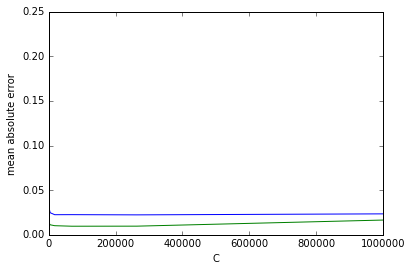

In [39]:
plt.plot(C_array,ns3)
plt.plot(C_array,nss3)
plt.xlabel('C')
plt.ylabel('mean absolute error')

In [40]:
#Как видно, с увеличением параметра С МАЕ становится меньше. Лучшее значение С -  предпоследнее в массиве C_array

In [41]:
C_array[18]#наше лучшее С

263665.0898730366

Обучим модель с лучшим значением параметра С

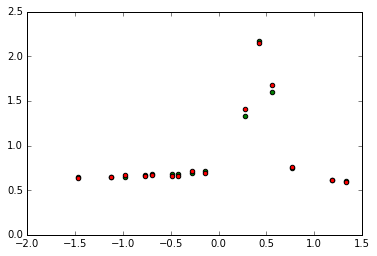

In [42]:
s = SVR(C=C_array[18], kernel='rbf',gamma = 6, coef0 = 1,  epsilon=0.01)
s.fit(X_train.reshape(-1,1), y_train)
y_preddds=s.predict(X_test.reshape(-1,1))
plt.scatter(X_test,y_test,c='g')#ответ
plt.scatter(X_test,y_preddds,c='r')#предсказание

Заметим, что это лучшее ядро из трех заданных. Алгоритм почти точно предсказывает ответы, даже для тех объектов, что "выделяются" и с которыми предыдущие два не справлялись.

# Определение языка слова (7 баллов)
В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английском и испанском, разбитые на слова.

# Загрузка (1 балл)
Загрузите данные из файлов war_and_peace_es.txt и war_and_peace_en.txt.
В результате вы должны получить pandas.DataFrame со столбцами index | word | label, где index - это индекс pandas, word - это слово и label - это метка класса (0 или 1)

In [2]:
text1=open('war_and_peace_en.txt','r')

In [3]:
text2=open('war_and_peace_es.txt','r')

In [4]:
text3=text1.read()

In [6]:
text3.split();

In [7]:
text4=text2.read()

In [8]:
text_final=text3.split()+text4.split()


In [9]:
w=pd.DataFrame(text_final)

In [10]:
w.head()

,0
0,war
1,and
2,peace
3,leo
4,tolstoy


In [11]:
w.columns=['word']#присвоим имя столбцу со словами

In [12]:
w.head()

,word
0,war
1,and
2,peace
3,leo
4,tolstoy


In [13]:
j=text3.split()

In [14]:
len(j)

5044

In [15]:
k=text4.split()

In [16]:
len(k)

6359

In [17]:
Answers=[0 for i in range(0,5044)]+[1 for i in range(0,6359)]#вектор меток

In [18]:
len(Answers)

11403

In [19]:
w['label']=Answers#добавим столбец с метками в датафрейм

In [20]:
w.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


# Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать CountVectorizer() с аргументами analyzer='char' и ngram_range=(n_min, n_max). Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:

Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")

Разбейте данные на обучающую и отложенную выборку в пропорции 80/20

Составьте Pipeline, состоящий из CountVectorizer() и SVM с линейным ядром

Исследуйте, как влияют размер n-грамм и величина штрафа C на предсказательную силу модели. Мера качества - accuracy.

In [61]:
 RND_SEED=1234

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(np.array(w['word']),np.array(w['label']), test_size = 0.2, random_state = RND_SEED)

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
from sklearn import svm

In [66]:
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char' )),('svm', svm.SVC(kernel='linear'))])

In [67]:
text_clf.fit(X_train1,y_train1)

Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test1,text_clf.predict(X_test1))

0.78518193774660239

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

In [71]:
sss = StratifiedShuffleSplit( test_size=0.2, random_state=RND_SEED)

In [72]:
 np.logspace(-3,1,5)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01])

In [73]:
par= {'vect__ngram_range': [ (1, 2),(2,2),(2,3),(3,3)],'svm__C':  np.logspace(-3,1,5)}

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
gs_clf = GridSearchCV(estimator=text_clf,cv=sss, param_grid=par, scoring='accuracy',n_jobs=4)

In [135]:
gs_clf.fit(w['word'],w['label'])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=1234, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'vect__ngram_range': [(1, 2), (2, 2), (2, 3), (3, 3)], 'svm__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [137]:
gs_clf.grid_scores_

C:\Users\Администратор\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.74616, std: 0.00563, params: {'vect__ngram_range': (1, 2), 'svm__C': 0.001},
 mean: 0.60868, std: 0.00253, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.001},
 mean: 0.61916, std: 0.00302, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.001},
 mean: 0.55765, std: 0.00000, params: {'vect__ngram_range': (3, 3), 'svm__C': 0.001},
 mean: 0.85103, std: 0.00450, params: {'vect__ngram_range': (1, 2), 'svm__C': 0.01},
 mean: 0.83178, std: 0.00619, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.01},
 mean: 0.86537, std: 0.00484, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.01},
 mean: 0.75804, std: 0.00841, params: {'vect__ngram_range': (3, 3), 'svm__C': 0.01},
 mean: 0.89307, std: 0.00559, params: {'vect__ngram_range': (1, 2), 'svm__C': 0.10000000000000001},
 mean: 0.87966, std: 0.00579, params: {'vect__ngram_range': (2, 2), 'svm__C': 0.10000000000000001},
 mean: 0.92942, std: 0.00487, params: {'vect__ngram_range': (2, 3), 'svm__C': 0.10000000000000001},
 mean: 0.91280, 

Как видно,наилучшее качество  0.94647 достигается при С=1.0, нграм (2, 3)

# Подход с пользовательским ядром
Подготовка данных (1 балла)
Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход только вектора чисел.

В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные.
Для этого:

Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")

Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())

Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец X_train, X_test с индексами слов и векторы y_train, y_test с метками классов.

In [21]:
RND_SEED=1234

In [22]:
ww=w.sample(11403)

In [23]:
ww.head()

,word,label
2475,his,0
9085,disturbare,1
5890,uomini,1
8100,una,1
2771,formed,0


In [24]:
ww=ww.reset_index(drop=True)

In [25]:
#ww.index.name = 'index'

In [26]:
ww.head()

,word,label
0,his,0
1,disturbare,1
2,uomini,1
3,una,1
4,formed,0


In [27]:
ww_new=ww[:1500]#Ядро может вычисляться достаточно долго,поэтому можете урезатьтаблицу,но оставить в ней не менее 1000 слов.

In [38]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(np.array(ww_new.index.values),np.array(ww_new['label']), test_size = 0.2, random_state = RND_SEED)

In [39]:
X_trainn[:10]

array([1216,  740, 1124, 1200,  605,   92,  896, 1063, 1336, 1462])

In [30]:
X_trainn.shape,X_testn.shape

((1200,), (300,))

# Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. 
Для сравнения строк будем использовать расстояние Левенштейна.

Реализацию этого расстояния можно получить одним из двух способов:

скопировать функцию wfi_levenshtein из файла pylev.py

поставить пакет editdistance (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной). Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:

Напишите функцию string_kernel(U, V), расчитывающую матрицу ядра $G_{ij}$

Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).

In [40]:
import editdistance
from math import exp

In [45]:
def string_kernel(U, V):
    #U  и V с признаковым описанием объектов 
    k=len(U)
    d=len(V)
    matrix=np.zeros((len(U),len(V)))
    sigma=0.2
    for i in range(len(U)):
        for j in range(len(V)):
            #Гауссова радиальная базисная функция
            # temp=editdistance.eval(ww.ix[U(i),'word'],ww.ix[V(j),'word'])
            matrix[i,j]=exp( editdistance.eval(ww_new.iloc[int(U[i])]['word'],ww_new.iloc[int(V[j])]['word'])/(2*(sigma**2))   )
            
            
    return matrix

In [46]:
plt.imshow(string_kernel(X_trainn,X_trainn))
plt.colorbar()

KeyboardInterrupt: 

In [141]:
ww.ix[:3,'word']

0    dichiar
1        her
2      andrj
3        say
Name: word, dtype: object

In [142]:
ww.iloc[:3]['word']

0    dichiar
1        her
2      andrj
Name: word, dtype: object